In [5]:
# !pip install flask
!pip3 install opencv-python

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [26/Dec/2021 13:34:05] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [26/Dec/2021 13:34:05] "GET /favicon.ico HTTP/1.1" 404 -


Sare Ahmed EL-Mahdy ISIC_20225 33 Female


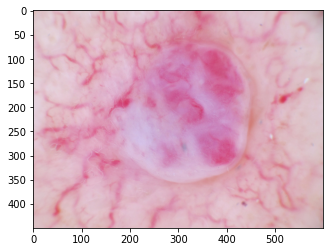

127.0.0.1 - - [26/Dec/2021 13:36:39] "POST /Solution HTTP/1.1" 200 -
127.0.0.1 - - [26/Dec/2021 13:45:12] "GET / HTTP/1.1" 200 -


Sare Ahmed EL-Mahdy ISIC_20225 33 Male


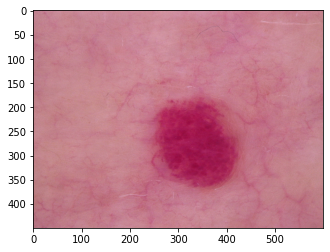

127.0.0.1 - - [26/Dec/2021 13:45:35] "POST /Solution HTTP/1.1" 200 -


Sare Ahmed EL-Mahdy ISIC_20225 33 Male


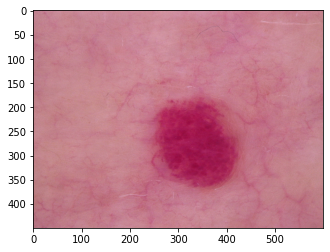

127.0.0.1 - - [26/Dec/2021 13:45:48] "POST /Solution HTTP/1.1" 200 -
127.0.0.1 - - [26/Dec/2021 13:45:53] "GET /home HTTP/1.1" 200 -
127.0.0.1 - - [26/Dec/2021 13:45:54] "GET /static/photo/Home3.png HTTP/1.1" 200 -
127.0.0.1 - - [26/Dec/2021 13:45:54] "GET /static/photo/Home2.png HTTP/1.1" 200 -
127.0.0.1 - - [26/Dec/2021 13:45:54] "GET /static/pics/Home4.png HTTP/1.1" 200 -
127.0.0.1 - - [26/Dec/2021 13:45:54] "GET /static/photo/Home1.png HTTP/1.1" 200 -
127.0.0.1 - - [26/Dec/2021 13:46:08] "GET /about HTTP/1.1" 200 -
127.0.0.1 - - [26/Dec/2021 13:46:08] "GET /static/pics/about.png HTTP/1.1" 200 -
127.0.0.1 - - [26/Dec/2021 13:52:57] "OPTIONS /Solution HTTP/1.1" 200 -
127.0.0.1 - - [26/Dec/2021 16:38:38] "GET /home HTTP/1.1" 200 -
127.0.0.1 - - [26/Dec/2021 16:38:38] "GET /static/photo/Home1.png HTTP/1.1" 304 -
127.0.0.1 - - [26/Dec/2021 16:38:39] "GET /static/photo/Home2.png HTTP/1.1" 304 -
127.0.0.1 - - [26/Dec/2021 16:38:39] "GET /static/photo/Home3.png HTTP/1.1" 304 -
127.0.0.1 - 

In [4]:
from flask import Flask
from flask import render_template
from flask import request
import tensorflow as tf 
import numpy as np
import os
from PIL import Image ,ImageOps
import matplotlib.pyplot as plt
import matplotlib.image as mpimg



app = Flask(__name__)

"""------------------------Load The Model And Preprocessing the  the input Img----------------------------------"""
model = '/'    # model's path where you have stored it.


# model = tf.keras.models.load_model('meys.h5')

data = np.ndarray(shape=(1, 224, 224, 4), dtype=np.float32)
image = Image.open('Home1.png')
size = (224, 224)
image = ImageOps.fit(image, size, Image.ANTIALIAS)
image_array = np.asarray(image)
normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1
data[0] = normalized_image_array



"""-----------------------End Of Preprocessing-----------------------------"""

@app.route("/dtls",methods=['GET', 'POST'])
def dtls():
    return render_template('dtls.html')

@app.route("/about",methods=['GET', 'POST'])
def Home():
    return render_template("about.html")

@app.route("/home",methods=['GET', 'POST'])
def About():
    return render_template("home.html")


@app.route("/",methods=['GET', 'POST'])
def Solution():
    return render_template("test.html")



@app.route("/Solution", methods=['GET', 'POST'])
def upload():
    if request.method == 'POST':
        
        id=request.form.get('a1')
        name=request.form.get('a2')
        age=request.form.get('a3')
        gender=request.form.get('a4')
        
        data={'id':id,'name':name,'age':age,'gender':gender}
        
        print (name,id,age,gender)   
#         res=request.form
#         print (res)
        img = request.files['image_file']
        
        if img == None:
        # Make prediction
            preds = model_predict(img)
            return ("Error")
        if img :
            img = mpimg.imread(img)
            imgplot = plt.imshow(img)
            plt.show()
            
    return render_template('dtls.html',data=data)
        


if __name__ == "__main__":
    app.run(debug = False)
    
 